In [44]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import TF_score
import pandas as pd
import pysam
import pickle
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pyBigWig

In [50]:
bw = pyBigWig.open('/gstore/home/toneyans//chrombpnet/chrombpnet/helpers/preprocessing/bw_inter_unstranded.bw')

peaks = []

for line in tqdm(open("../training_data/peaks/C1_peaks.bed")):
    cols = line.strip().split()
    vals = bw.values(cols[0], int(cols[1]), int(cols[2]))
    peaks.append(np.nanmean(vals))
bw.close()


29566it [00:05, 5102.13it/s]


In [51]:
neg_control = util.adjust_range(pd.read_csv("../training_data/peaks/compl_C1_peaks.bed", sep='\t', header=None),
                  2114)


bw = pyBigWig.open('/gstore/home/toneyans//chrombpnet/chrombpnet/helpers/preprocessing/bw_inter_unstranded.bw')

non_peaks = []

for i, line in tqdm(neg_control.iterrows()):
    vals = bw.values(cols[0], int(cols[1]), int(cols[2]))
    non_peaks.append(np.nanmean(vals))
bw.close()

29568it [00:10, 2797.45it/s]


In [56]:
regulon = pd.read_csv('/gstore/home/toneyans/regulon.csv')

In [58]:
regulon[regulon['tf'] == 'GATA6']

,Unnamed: 0,idxATAC,chr,start,end,idxRNA,target,all,distance,idxTF,tf
1477,1478,16,chr1,941458,941958,17,LINC01128,0.550329,113661,332,GATA6
14206,14207,121,chr1,1375168,1375668,56,CPTP,0.541579,50167,332,GATA6
15139,15140,121,chr1,1375168,1375668,62,MRPL20-AS1,0.558290,21902,332,GATA6
28482,28483,515,chr1,6359672,6360172,181,ESPN,0.599202,62602,332,GATA6
28994,28995,543,chr1,6600992,6601492,192,LINC01672,0.559912,121143,332,GATA6
...,...,...,...,...,...,...,...,...,...,...,...
3635989,3635990,126325,chrX,136909972,136910472,36233,AL683813.1,0.505671,61976,332,GATA6
3636300,3636301,126405,chrX,149539877,149540377,36296,TMEM185A,0.514558,58091,332,GATA6
3636415,3636416,126410,chrX,149719831,149720331,36296,TMEM185A,0.643130,119162,332,GATA6
3641895,3641896,126570,chrX,154541878,154542378,36406,G6PD,0.569811,2466,332,GATA6


<Axes: ylabel='Count'>

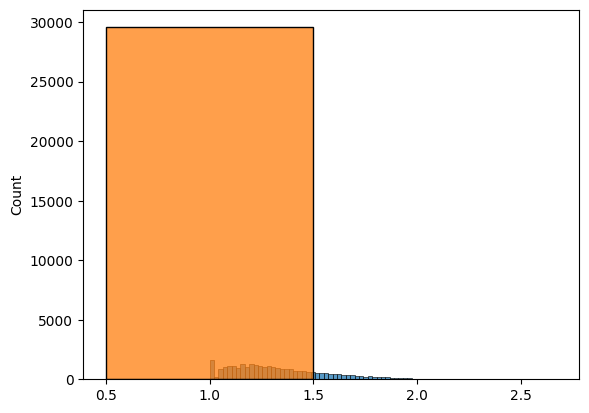

In [53]:
sns.histplot(peaks)
sns.histplot(non_peaks)

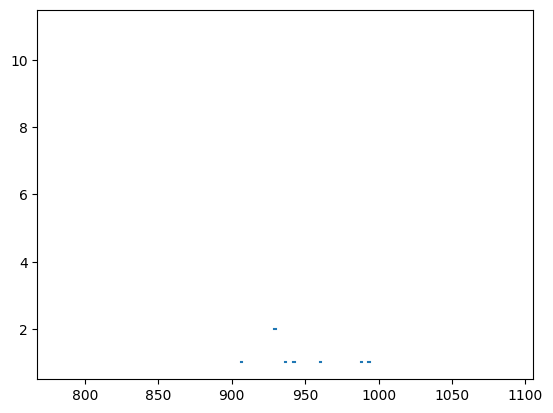

In [40]:
plt.plot(v[1078660:1079780])

In [38]:
np.argwhere(v>10 )

array([[  1079680],
       [  1375425],
       [  1375446],
       [  1919304],
       [  2050360],
       [  2133274],
       [  6579985],
       [  7961560],
       [  8005374],
       [  8412419],
       [  9910472],
       [  9910630],
       [ 11060044],
       [ 11060060],
       [ 11262594],
       [ 11262672],
       [ 28247348],
       [ 28369688],
       [ 29181988],
       [ 30718327],
       [ 32651099],
       [ 32817426],
       [ 33037055],
       [ 33127335],
       [ 35193396],
       [ 36151032],
       [ 36386087],
       [ 39408712],
       [ 40040587],
       [ 40979664],
       [ 41361143],
       [ 42463088],
       [ 42682249],
       [ 44355272],
       [ 44674211],
       [ 44986656],
       [ 45491323],
       [ 45491502],
       [ 45686623],
       [ 46133107],
       [ 48472252],
       [ 52366264],
       [ 52404463],
       [ 53220597],
       [ 53945792],
       [ 53945924],
       [ 54764711],
       [ 58784297],
       [ 63367551],
       [ 65420349],


In [16]:
step1 = pd.read_csv('../training_data/fragments/C1_combined_frags.bed', sep='\t', header=None)

In [17]:
step1[1] = step1[1].astype('int')
step1[2] = step1[2].astype('int')

In [18]:
step1.to_csv('../training_data/fragments/C1_combined_frags_nosci.bed', sep='\t', header=None, index=None)

In [5]:

df = pd.read_csv("../motifs_in_peaks/C1_Motifs.bed", sep = '\t', header = None)
fasta_ref = pysam.FastaFile('../../genomes/hg38.fa')
model_string="./doubletRemoved_models/C1_chrombpnet_nobias.h5"
output=("../results/shreya/C1_Score.bed")

In [ ]:

model = TF_score.load_model_wrapper(model_string)


In [52]:
ref_list, alt_list, rev_alt_list, rev_ref_list, lengths = TF_score.createMotifSequences(df, fasta_ref)


991791it [43:32, 379.70it/s]


In [53]:
# out_dir = TF_score.make_dir('results/')
# for k, v in {"ref_seqs":ref_seqs, 
#             "alt_seqs": alt_seqs,
#             "rc_ref_seqs": rc_ref_seqs,
#             "rc_alt_seqs": rc_alt_seqs}.items():
#     with open(f"{out_dir}/{k}_C1.pickle", "wb") as fp:   #Pickling
#         pickle.dump(v, fp)

with open("ref_list_C1", "wb") as fp:   #Pickling
    pickle.dump(ref_list, fp)

with open("alt_list_C1", "wb") as fp:   #Pickling
    pickle.dump(alt_list, fp)

with open("rev_alt_list_C1", "wb") as fp:   #Pickling
    pickle.dump(rev_alt_list, fp)

with open("rev_ref_list_C1", "wb") as fp:   #Pickling
    pickle.dump(rev_ref_list, fp)

In [16]:
output = f"{out_dir}/C1_score.tsv"


In [3]:

with open("ref_list_C1", "rb") as fp:   #Pickling
    ref_list=pickle.load(fp)

with open("alt_list_C1", "rb") as fp:   #Pickling
    alt_list = pickle.load(fp)

with open("rev_alt_list_C1", "rb") as fp:   #Pickling
    rev_alt_list = pickle.load(fp)

with open("rev_ref_list_C1", "rb") as fp:   #Pickling
    rev_ref_list = pickle.load(fp)


In [54]:

best_diff = 0
for i in tqdm(range(1000)):
    
    preds = model.predict_on_batch(np.expand_dims(ref_list[i], axis=0))
    preds_alt = model.predict_on_batch(np.expand_dims(alt_list[i], axis=0))
    if np.abs(preds[1]- preds_alt[1]) > best_diff:
        # print('updating best diff')
        best_example = [preds, preds_alt]
        best_diff = np.abs(preds[1]- preds_alt[1])

100%|██████████| 1000/1000 [00:20<00:00, 49.84it/s]


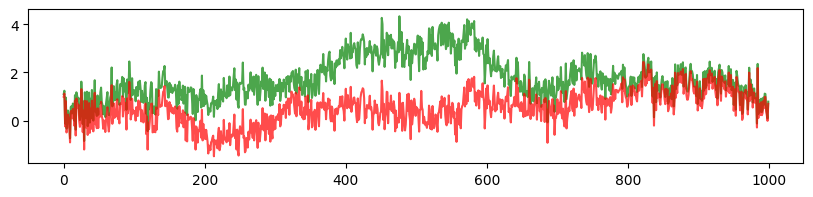

In [55]:
preds, preds_alt = best_example
plt.figure(figsize=[10,2])
plt.plot(preds[0][0].T, color='g', alpha=0.7)

# plt.figure(figsize=[10,2])
plt.plot(preds_alt[0][0].T, color='r', alpha=0.7)

In [56]:
preds[1]- preds_alt[1]

array([[0.6096995]], dtype=float32)

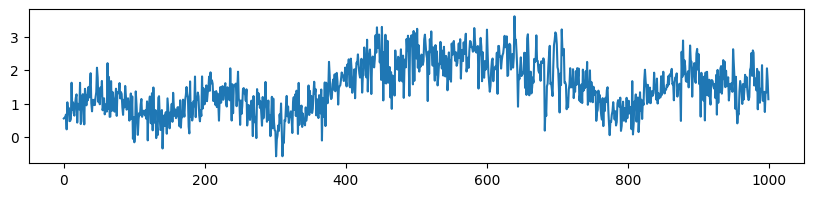

In [27]:
preds[1]

array([[3.8187537]], dtype=float32)

In [28]:
preds_alt[1]

array([[3.67609]], dtype=float32)

In [8]:
score, jsd_score, rev_score, rev_jsd_score = TF_score.tf_score(model, ref_list, alt_list, rev_alt_list, rev_ref_list)


  0%|          | 0/41932924 [00:00<?, ?it/s]

Here 0


  0%|          | 0/41932924 [00:07<?, ?it/s]


ValueError: in user code:

    File "/gstore/home/toneyans/anaconda3/envs/cbp/lib/python3.9/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/gstore/home/toneyans/anaconda3/envs/cbp/lib/python3.9/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/gstore/home/toneyans/anaconda3/envs/cbp/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/gstore/home/toneyans/anaconda3/envs/cbp/lib/python3.9/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/gstore/home/toneyans/anaconda3/envs/cbp/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/gstore/home/toneyans/anaconda3/envs/cbp/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 2114, 4), found shape=(50, 4)


In [11]:
np.vstack(ref_list).shape

(2096646174, 4)

In [20]:
df1 = pd.DataFrame()
df1['score'] = score
df1['jsd_score'] = jsd_score 
df1['rev_score']=rev_score
df1['rev_jsd_score']=rev_jsd_score
with open("score_C1", "wb") as fp:   #Pickling
    pickle.dump(df1, fp)

df['score'] = score
df['jsd_score'] = jsd_score 
df['rev_score']=rev_score
df['rev_jsd_score']=rev_jsd_score
df.to_csv(output, sep='\t')

<Axes: xlabel='score', ylabel='jsd_score'>

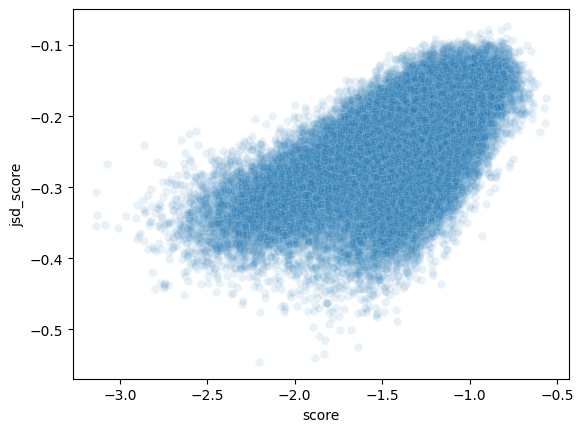

In [32]:
sns.scatterplot(data=df, x='score', y='jsd_score', alpha=0.1)

# compare to non-peak outputs

In [25]:
df_ori = pd.read_csv("training_data/peaks/compl_C1_peaks.bed", sep = '\t', header = None)
fasta_ref = pysam.FastaFile('../genomes/hg38.fa')
model_string="doubletRemoved_models/C1_chrombpnet_nobias.h5"
output=("results/compl_C1_Score.bed")

In [26]:
centered_df_rows = []
for i, row in df_ori.iterrows():
    center = row[2] - row[1]
    s, e = center-2114//2, center+2114//2
    if s > 0:
        centered_df_rows.append([row[0], s, e])


In [27]:
df = pd.DataFrame(centered_df_rows)
df.head()

,0,1,2
0,chr1,826219,828333
1,chr1,40819,42933
2,chr1,48963,51077
3,chr1,1048,3162
4,chr1,7869,9983


In [14]:
model = TF_score.load_model_wrapper(model_string)


got the model


In [43]:
ref_seqs, alt_seqs, lengths = TF_score.createMotifSequences(df, fasta_ref, L_peak=1000, rc=False)


9it [00:00, 1788.79it/s]

Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually
Setting peak length manually


ValueError: start out of range (-285)

In [42]:
df_ori

,0,1,2
0,chr1,0,827276
1,chr1,827777,869653
2,chr1,870154,920174
3,chr1,920675,920986
4,chr1,921487,923592
...,...,...,...
29563,chrX,155071501,155216651
29564,chrX,155217152,155264218
29565,chrX,155264719,155820098
29566,chrX,155820599,156040895


In [35]:
L_input_seq = 2114
for index, row in (df_ori.iterrows()):
    length = int(row[2] - row[1]) # peak length
    if length % 2 == 1:
        length = length + 1
    pos = (length / 2) + row[1] # peak center
    chrom = row[0] # chromosome
    start = pos - (L_input_seq / 2) # half window left from center
    end = pos + (L_input_seq / 2) # half window right from center

    # Store length for later normalizing - note that we need an even length so this is rounded

    ref_seq = fasta_ref.fetch(chrom, start, end).upper() # get reference sequence
    break

In [36]:
len(ref_seq)

2114